In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [33]:
df = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\collagens_proteins\\substitution_counts_path_benign_cols.csv")
# change the name of the "Unnamed: 0" column to "substitution"
df = df.rename(columns={"Unnamed: 0": "substitution"})
df


,Unnamed: 0.1,substitution,TP,FP,TN,FN,pathogenic,benign
0,0,GV,146,1,0,1,147,1
1,1,RC,10,1,0,7,17,1
2,2,GC,46,0,0,0,46,0
3,3,GR,216,2,0,0,216,2
4,4,PQ,1,1,0,1,2,1
...,...,...,...,...,...,...,...,...
84,84,RS,0,0,1,0,0,1
85,85,VM,0,0,1,0,0,1
86,86,LM,0,0,1,0,0,1
87,87,QW,0,1,0,0,0,1


In [34]:
# calculate the numbar of pathogenic and benign for all the substitutions
pathogenic_sum = df['pathogenic'].sum()
benign_sum = df['benign'].sum()
normalization_factor = pathogenic_sum/benign_sum
df['benign_normalized'] = df['benign']*normalization_factor

In [35]:
# arrange the substitutions by the number of pathogenic, from the highest to the lowest
df = df.sort_values(by='pathogenic', ascending=False)
df

,Unnamed: 0.1,substitution,TP,FP,TN,FN,pathogenic,benign,benign_normalized
3,3,GR,216,2,0,0,216,2,16.420168
7,7,GD,159,0,0,1,160,0,0.000000
0,0,GV,146,1,0,1,147,1,8.210084
8,8,GE,117,2,0,0,117,2,16.420168
6,6,GS,99,2,0,7,106,2,16.420168
...,...,...,...,...,...,...,...,...,...
18,18,SP,0,0,3,0,0,3,24.630252
16,16,FI,0,0,1,0,0,1,8.210084
14,14,TS,0,0,2,0,0,2,16.420168
13,13,IV,0,0,4,0,0,4,32.840336


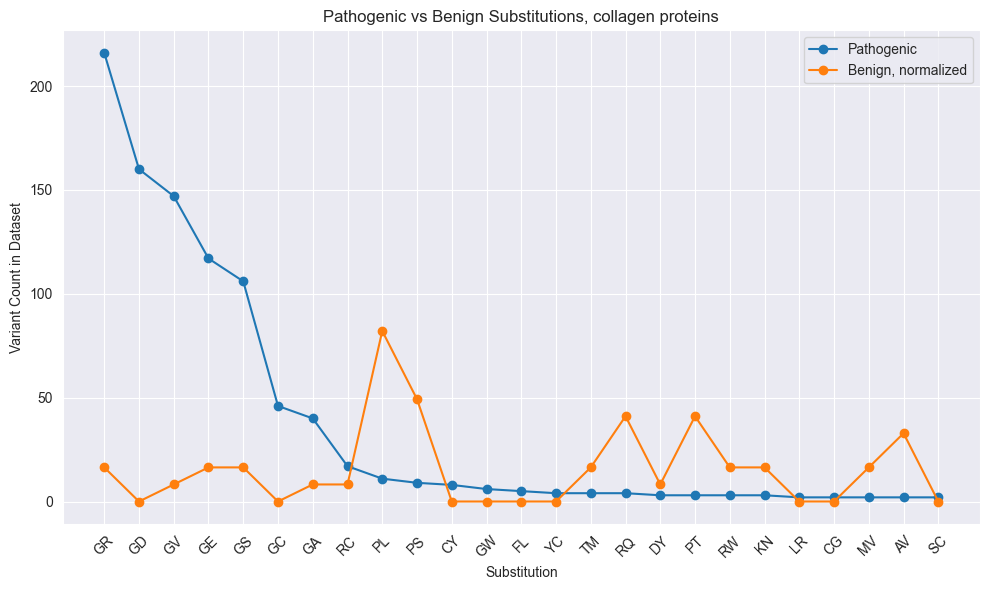

In [37]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

top_15_pathogenic = df.head(25)

# Plot data
ax.plot(top_15_pathogenic["substitution"], top_15_pathogenic["pathogenic"], marker='o', label='Pathogenic')
ax.plot(top_15_pathogenic["substitution"], top_15_pathogenic["benign_normalized"], marker='o', label='Benign, normalized')

# Set labels and title
ax.set_xlabel('Substitution')
ax.set_ylabel('Variant Count in Dataset')
ax.set_title('Pathogenic vs Benign Substitutions, collagen proteins')

# Add legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()